In [105]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg,spatial,signal

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

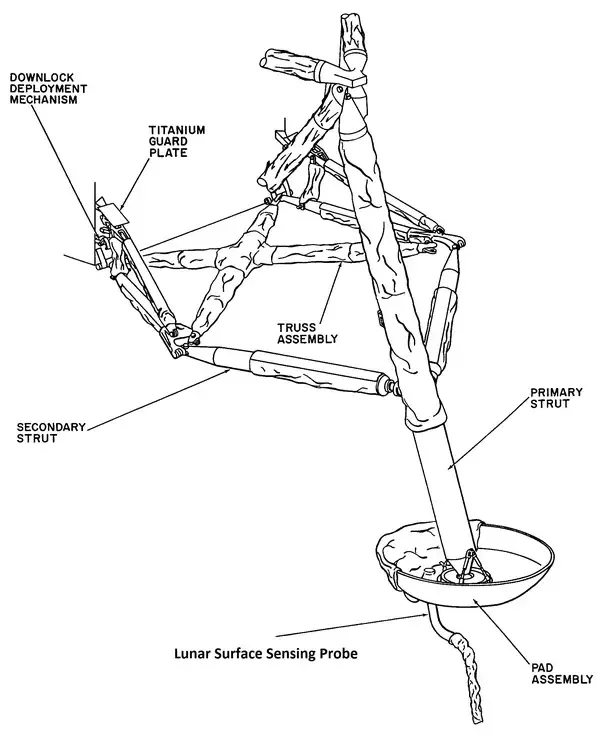

(6, 2)
(5, 2)


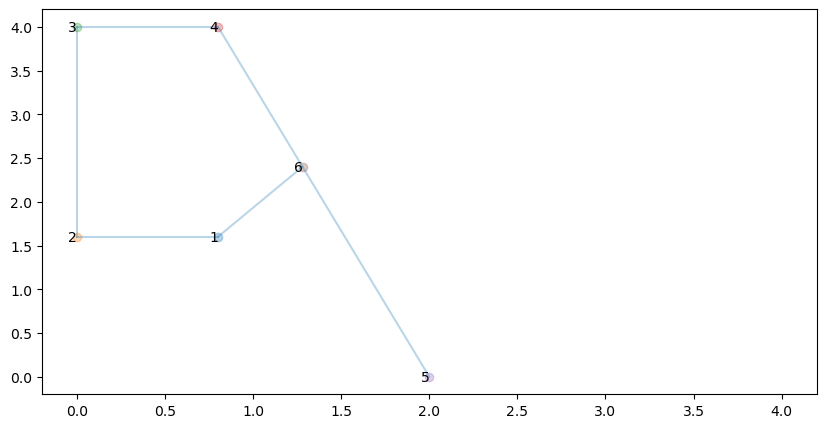

In [106]:
L1 = 2 # m - dolžina
L2 = 4 # m - višina
k1 = 0.4
k2 = 0.4
vozlisca_osn_sk = np.array([[k1 * L1, k2 * L2], [0, k2*L2], [0,L2], [k1 * L1, L2], [L1, 0]])

# Dolocitev vmesnega vozlisca
k3 = 0.6
y_P = k3*L2
x_P = (k3*(k1-1) +1)*L1
vozlisca_osn_sk = np.append(vozlisca_osn_sk, [x_P, y_P])
elementi_osn_sk = np.array([[0,1],[1,2], [2, 3], [3, 4], [0,5]])
vozlisca_osn_sk = vozlisca_osn_sk.reshape(6, 2)

# Izris
fig, ax = plt.subplots(figsize = (10, 5))
for i in vozlisca_osn_sk:
    ax.plot(i[0], i[1], 'o', alpha=0.3)

for element in elementi_osn_sk:
    x = [vozlisca_osn_sk[element[0], 0], vozlisca_osn_sk[element[1], 0]]
    y = [vozlisca_osn_sk[element[0], 1], vozlisca_osn_sk[element[1], 1]]
    ax.plot(x, y, 'C0', alpha=0.3)
[plt.text(*c,n+1) for n,c in enumerate(vozlisca_osn_sk-0.05)];

ax.set_xlim(-0.2, 4.2)
ax.set_ylim(-0.2, 4.2)
print(vozlisca_osn_sk.shape)   # Output: (3, 2)
print(elementi_osn_sk.shape)

In [107]:
def zgostitev(vozlisca_osn, elementi_osn, number_of_elements = [2]):
    
    # V primeru, ko so vsi 
    if len(number_of_elements) == 1:
        
        vozlisca = np.copy(vozlisca_osn)
        elementi = np.empty((0,2), int)
        
        for i in elementi_osn: 
            x = np.linspace(vozlisca[i[0],0], vozlisca_osn[i[1],0], number_of_elements[0] + 1)[1:-1]
            y = np.linspace(vozlisca[i[0],1], vozlisca_osn[i[1],1], number_of_elements[0] + 1)[1:-1]
            voz = np.column_stack((x, y))
            
            novi_ind_vozlisc = len(vozlisca) + np.arange(len(voz))
            vozlisca = np.append(vozlisca, voz, axis = 0)
            sez_voz = np.block([i[0],novi_ind_vozlisc,i[1]])
            elem = np.array([[sez_voz[_],sez_voz[_+1]] for _ in range(len(sez_voz)-1)])
            elementi = np.append(elementi, elem, axis = 0)
        return (vozlisca, elementi)
    
    elif len(number_of_elements) == len(elementi_osn):
        vozlisca = np.copy(vozlisca_osn)
        elementi = np.empty((0,2), int)
        
        for j in np.arange(len(elementi_osn)):
            x = np.linspace(vozlisca[elementi_osn[j][0],0], vozlisca_osn[elementi_osn[j][1],0], 1 + int(number_of_elements[j]))[1:-1]
            y = np.linspace(vozlisca[elementi_osn[j][0],1], vozlisca_osn[elementi_osn[j][1],1], 1 + int(number_of_elements[j]))[1:-1]
            voz = np.column_stack((x, y))
        
            novi_ind_vozlisc = len(vozlisca) + np.arange(len(voz))
            vozlisca = np.append(vozlisca, voz, axis = 0)
            sez_voz = np.block([elementi_osn[j][0], novi_ind_vozlisc, elementi_osn[j][1]])
            elem = np.array([[sez_voz[_],sez_voz[_+1]] for _ in range(len(sez_voz)-1)])
            elementi = np.append(elementi, elem, axis = 0)
        return (vozlisca, elementi)
    # return(vozlisca, elementi)
    
    else:
        print("Error!")
        print("To many numbers of elements - Array to long")

(4, 2)
(3, 2)


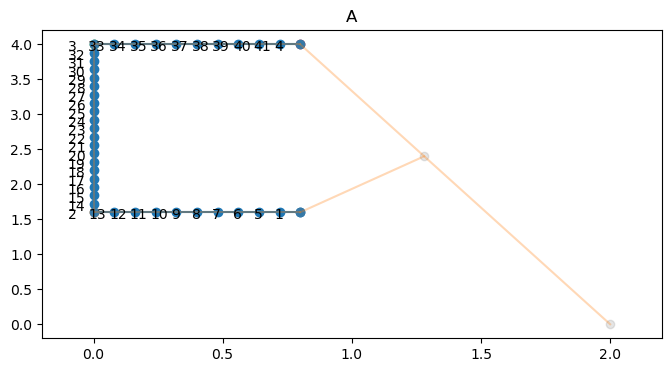

In [108]:
vozlisca_osn_A = np.array([[k1 * L1, k2 * L2], [0, k2*L2], [0,L2], [k1 * L1, L2], [L1, 0]])

# Dolocitev vmesnega vozlisca
# k3 = 0.6
y_P = k3*L2
x_P = (k3*(k1-1) +1)*L1
vozlisca_osn_A = np.append(vozlisca_osn_A, [x_P, y_P])
elementi_osn_A = np.array([[0,1],[1,2], [2, 3]])
vozlisca_osn_A = vozlisca_osn_A.reshape(6, 2)[:-2] 


fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("A")
for i in vozlisca_osn_A:
    ax.plot(i[0], i[1], 'o')

for element in elementi_osn_A:
    x = [vozlisca_osn_A[element[0], 0], vozlisca_osn_A[element[1], 0]]
    y = [vozlisca_osn_A[element[0], 1], vozlisca_osn_A[element[1], 1]]
    ax.plot(x, y, 'C0')

ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-0.2, 4.2)

# Zgostitev
vozlisca_A, elementi_A = zgostitev(vozlisca_osn_A, elementi_osn_A, [10, 20, 10])

for i in np.arange(len(vozlisca_A)):
    ax.plot(vozlisca_A[i][0], vozlisca_A[i][1], 'o', color='C0')
[ax.text(*c,n+1) for n,c in enumerate(vozlisca_A-0.1)];

# Izris backup strukture
for i in vozlisca_osn_sk:
    ax.plot(i[0], i[1], 'o', alpha=0.2, color="gray")

for element in elementi_osn_sk:
    x = [vozlisca_osn_sk[element[0], 0], vozlisca_osn_sk[element[1], 0]]
    y = [vozlisca_osn_sk[element[0], 1], vozlisca_osn_sk[element[1], 1]]
    ax.plot(x, y, 'C1', alpha=0.3)

print(vozlisca_osn_A.shape)   # Output: (3, 2)
print(elementi_osn_A.shape)

## Definicija matrik

In [109]:
# OKVIR
# transformacijska matrika
def T(α):
    
    T = np.array([[ np.cos(α), np.sin(α), 0,         0,         0, 0],
                   [-np.sin(α), np.cos(α), 0,         0,         0, 0],
                   [         0,         0, 1,         0,         0, 0],
                   [         0,         0, 0, np.cos(α), np.sin(α), 0],
                   [         0,         0, 0,-np.sin(α), np.cos(α), 0],
                   [         0,         0, 0,         0,         0, 1]])
        
    return T

# masna matrika
def M_o(A, L, ρ, α):

    M_lok = ρ*A*L*np.array([[1/3,         0,         0, 1/6,         0,         0],
                            [  0,     13/35,  11*L/210,   0,      9/70, -13*L/420],
                            [  0,  11*L/210,  L**2/105,   0,  13*L/420, -L**2/140],
                            [1/6,         0,         0, 1/3,         0,         0],
                            [  0,      9/70,  13*L/420,   0,     13/35, -11*L/210],
                            [  0, -13*L/420, -L**2/140,   0, -11*L/210,  L**2/105]])
    
    return T(α).T @ M_lok @ T(α)

# togostna matrika
def K_o(A, E, I, L, α):

    K_lok = E/L*np.array([[ A,          0,      0, -A,          0,      0],
                          [ 0,  12*I/L**2,  6*I/L,  0, -12*I/L**2,  6*I/L],
                          [ 0,      6*I/L,    4*I,  0,     -6*I/L,    2*I],
                          [-A,          0,      0,  A,          0,      0],
                          [ 0, -12*I/L**2, -6*I/L,  0,  12*I/L**2, -6*I/L],
                          [ 0,      6*I/L,    2*I,  0,     -6*I/L,    4*I]])
    
    return T(α).T @ K_lok @ T(α)

In [110]:
# Podstruktura A - okvir

h = 0.005 # m
D = 0.2 # m
d = D-2*h

ρ_A = 2700 # kg /m3
E_A = 100e9 # Pa recimo nek specialen Al

A_A = np.pi * ((D/2)**2 - (D/2-h)**2)
I_A = np.pi/4 * (D**4 - d**4)
#h*h**3/12 # m^4

# zlaganje
n_ps_A = 3*len(vozlisca_A)
M_glob_A = np.zeros((n_ps_A,n_ps_A))
K_glob_A = np.zeros((n_ps_A,n_ps_A))

for element in elementi_A:
    Le = sp.spatial.distance.euclidean(vozlisca_A[element[0]], vozlisca_A[element[1]])
    αe = np.arctan2(np.diff(vozlisca_A[element,1]) , np.diff(vozlisca_A[element,0]))[0]
    ind = (3*element[:,None] + np.array([0, 1, 2])).flatten()
    
    M_glob_A[ind[:,None],ind] += M_o(A_A, Le, ρ_A, αe)
    K_glob_A[ind[:,None],ind] += K_o(A_A, E_A, I_A, Le, αe)
    
print(M_glob_A.shape)
print(K_glob_A.shape)

(123, 123)
(123, 123)


## Robni pogoji

In [111]:
# ROBNI POGOJI
ind_vpetih_ps = np.array([3,4,6,7]) # np.array([3,4,5,6,7,8])
# ind_vpetih_ps
# tvorimo matriko C
C = np.zeros((ind_vpetih_ps.size,M_glob_A.shape[0]))
for n, i in enumerate(ind_vpetih_ps):
    C[n, i] = 1

L = sp.linalg.null_space(C)

M_glob_A_rp = L.T @ M_glob_A @ L
K_glob_A_rp = L.T @ K_glob_A @ L
# C[:, :9]
C.shape

(4, 123)

In [112]:
# lastne vrednosti in lastni vektorji
eig_val, eig_vec = sp.linalg.eig(K_glob_A_rp, M_glob_A_rp)

# urejanje po velikosti
_ind = np.argsort(np.abs(eig_val))
eig_val = eig_val[_ind]
eig_vec = eig_vec[:,_ind]
eig_vec = L @ eig_vec

eig_freq = np.abs(eig_val)**0.5 / 2 / np.pi

# lastne frekvence [Hz]
eig_freq[:4].round(1)

array([ 366.3,  802.9, 1232.7, 1269.2])

In [113]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

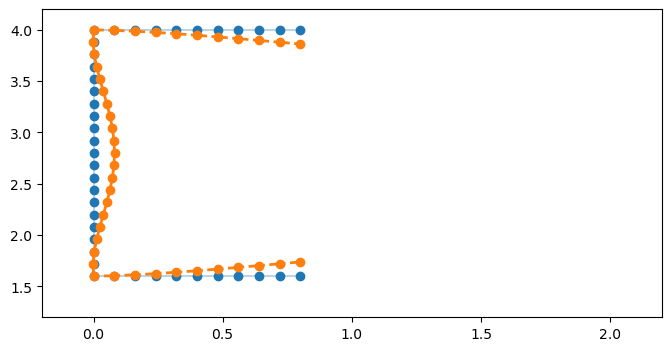

In [114]:
m = 2
s = 1

pomiki_x = eig_vec[0::3,m]
pomiki_y = eig_vec[1::3,m]

def_vozlisca = np.copy(vozlisca_A)
def_vozlisca[:,0] += pomiki_x *s
def_vozlisca[:,1] += pomiki_y * s


%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(1.2, 4.2)

# nedeformirana geometrija
[ax.plot(vozlisca_A[[i,j],0],vozlisca_A[[i,j],1],'-',c='C0', alpha=0.3) for i,j in elementi_A]
ax.plot(vozlisca_A[:,0],vozlisca_A[:,1],'o');

# deformirana geometrija
[ax.plot(def_vozlisca[[i,j],0],def_vozlisca[[i,j],1],'--', lw=2,c='C1') for i,j in elementi_A]
ax.plot(def_vozlisca[:,0],def_vozlisca[:,1],'o');

# plt.hlines(0,1.6, 0)

In [115]:
def_vozlisca.shape, vozlisca_A.shape

((41, 2), (41, 2))

MovieWriter imagemagick unavailable; using Pillow instead.


AttributeError: 'FuncAnimation' object has no attribute 'shape'

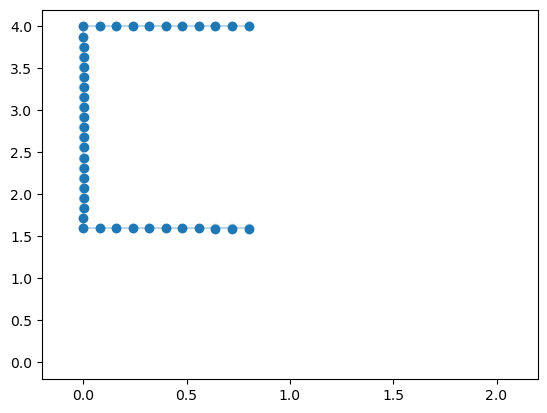

In [118]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

m = 2
for m in np.arange(10):
    s = 1

    pomiki_x = eig_vec[0::3,m]
    pomiki_y = eig_vec[1::3,m]

    def_vozlisca = np.copy(vozlisca_A)
    def_vozlisca[:,0] += pomiki_x *s
    def_vozlisca[:,1] += pomiki_y * s


    # Define the undeformed and deformed coordinates
    undeformed_coords = vozlisca_A #[[1, 1], [2, 2]]
    deformed_coords = def_vozlisca # [[1, 1.5], [2.5, 2.5]]

    # Calculate the deformation array
    deformation = np.array(deformed_coords) - np.array(undeformed_coords)

    # Define the number of frames for each deformation direction
    n_frames = 20

    # Define the animation direction sequence
    directions = [1, -1]

    # Create a figure and axis object
    fig, ax = plt.subplots()
    [ax.plot(vozlisca_A[[i,j],0],vozlisca_A[[i,j],1],'-',c='C0', alpha=0.3) for i,j in elementi_A]
    ax.plot(vozlisca_A[:,0],vozlisca_A[:,1],'o', alpha=0.3);

    # Set the axis limits
    ax.set_xlim([-0.2, 2.2])
    ax.set_ylim([-0.2, 4.2])

    # Create a scatter plot of the undeformed coordinates
    scatter = ax.scatter([c[0] for c in undeformed_coords], [c[1] for c in undeformed_coords])

    # Define the update function for the animation
    def update(frame):
        # Calculate the current deformation factor based on the current frame and direction
        direction = directions[frame // (2 * n_frames)]
        frame = frame % (2 * n_frames)
        alpha = frame / n_frames if frame < n_frames else (2 * n_frames - frame) / n_frames
        factor = direction * alpha
        
        # Calculate the current coordinates based on the current deformation factor
        coords = [[u[0] + factor * d[0], u[1] + factor * d[1]] for u, d in zip(undeformed_coords, deformation)]
        
        # Update the scatter plot with the current coordinates
        scatter.set_offsets(coords)
        
        # Return the scatter plot for this frame
        return scatter,

    # Define the total number of frames for the animations
    total_frames = 4 * n_frames

    # Create the animation object
    animation = FuncAnimation(fig, update, frames=total_frames, interval=50)

    # Save the animation as a GIF
    animation.save(f'deformation_{m}.gif', writer='imagemagick')
    print(f'GIF {m} ustvarjen!')


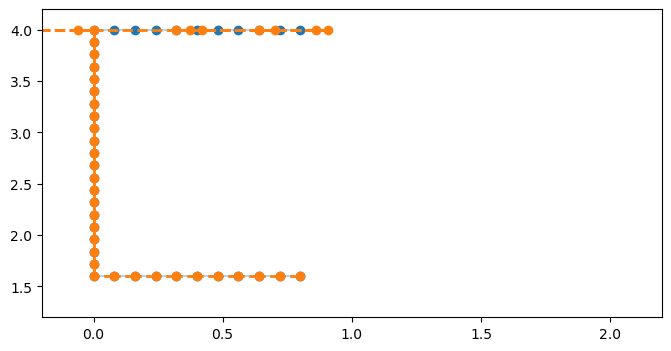

In [117]:

%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(1.2, 4.2)

# nedeformirana geometrija
[ax.plot(vozlisca_A[[i,j],0],vozlisca_A[[i,j],1],'-',c='C0', alpha=0.3) for i,j in elementi_A]
ax.plot(vozlisca_A[:,0],vozlisca_A[:,1],'o');

# deformirana geometrija
[ax.plot(def_vozlisca[[i,j],0],def_vozlisca[[i,j],1],'--', lw=2,c='C1') for i,j in elementi_A]
ax.plot(def_vozlisca[:,0],def_vozlisca[:,1],'o');

# plt.hlines(0,1.6, 0)